In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
pd.get_dummies(df['sex'])

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [6]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
pd.get_dummies(df['region'])

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [8]:
df_t = pd.get_dummies(df['region'])
df_t

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [11]:
df = pd.get_dummies(df)
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [14]:
X = df.drop('charges',axis=1)
y = df['charges']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train) + len(X_test)

(1338, 1338)

In [23]:
tf.random.set_seed(42)
# step 1 - create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# step 2 - compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics= ['mae'])
# step 3 - fit the model.
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8517.0322 - mae: 8517.0322
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7880.7329 - mae: 7880.7329
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7601.6333 - mae: 7601.6333
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7769.4180 - mae: 7769.4180
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7688.9082 - mae: 7688.9082
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7645.5317 - mae: 7645.5317
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.0981 - mae: 7528.0981
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7691.0947 - mae: 7691.0947
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7514.8096 - mae: 7514.8096
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7764.4961 - mae: 7764.4961

34/34 [==============================] - 0s 2ms/step - loss: 7171.8311 - mae: 7171.8311
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 7395.4053 - mae: 7395.4053
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 7314.8135 - mae: 7314.8135
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 7603.0376 - mae: 7603.0376
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 7400.4316 - mae: 7400.4316
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 7287.0781 - mae: 7287.0781
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 7306.4512 - mae: 7306.4512
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 7497.2822 - mae: 7497.2822
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 7099.6206 - mae: 7099.6206
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 7224.1182 - mae: 7224.1182
Epo

In [20]:
# check the results on test data
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7207.1348 - mae: 7207.1348


[7207.134765625, 7207.134765625]

# Experiment - add extra layer

In [31]:
tf.random.set_seed(42)
# step 1 - create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# step 2 - compile the model
model_1.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics= ['mae'])
# step 3 - fit the model.
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13265.6045 - mae: 13265.6045
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13056.0127 - mae: 13056.0127
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12636.2148 - mae: 12636.2148
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11848.7451 - mae: 11848.7451
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10614.7715 - mae: 10614.7715
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9162.6699 - mae: 9162.6699
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7963.4814 - mae: 7963.4814
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7509.8423 - mae: 7509.8423
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7446.3813 - mae: 7446.3813
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7426.0684 - mae:

34/34 [==============================] - 0s 2ms/step - loss: 5712.2925 - mae: 5712.2925
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 5679.1743 - mae: 5679.1743
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 5640.3726 - mae: 5640.3726
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 5609.9009 - mae: 5609.9009
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 5569.6987 - mae: 5569.6987
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 5525.5127 - mae: 5525.5127
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 5483.3765 - mae: 5483.3765
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 5436.7148 - mae: 5436.7148
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 5386.7744 - mae: 5386.7744
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 5341.2549 - mae: 5341.2549
Epo

In [32]:
# check the results on test data
model_1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4673.4448 - mae: 4673.4448


[4673.44482421875, 4673.44482421875]

In [36]:
tf.random.set_seed(42)
# step 1 - create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# step 2 - compile the model
model_1.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics= ['mae'])
# step 3 - fit the model.
history = model_1.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13304.1885 - mae: 13304.1885
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13182.4092 - mae: 13182.4092
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12922.0166 - mae: 12922.0166
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12380.7354 - mae: 12380.7354
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 11399.5078 - mae: 11399.5078
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9988.1475 - mae: 9988.1475
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8519.3135 - mae: 8519.3135
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7626.3477 - mae: 7626.3477
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7433.2344 - mae: 7433.2344
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7408.4849 - mae:

34/34 [==============================] - 0s 2ms/step - loss: 5913.0371 - mae: 5913.0371
Epoch 83/200
34/34 [==============================] - 0s 2ms/step - loss: 5888.0024 - mae: 5888.0024
Epoch 84/200
34/34 [==============================] - 0s 2ms/step - loss: 5857.5386 - mae: 5857.5386
Epoch 85/200
34/34 [==============================] - 0s 2ms/step - loss: 5837.1543 - mae: 5837.1543
Epoch 86/200
34/34 [==============================] - 0s 2ms/step - loss: 5805.3179 - mae: 5805.3179
Epoch 87/200
34/34 [==============================] - 0s 2ms/step - loss: 5774.7549 - mae: 5774.7549
Epoch 88/200
34/34 [==============================] - 0s 2ms/step - loss: 5747.7812 - mae: 5747.7812
Epoch 89/200
34/34 [==============================] - 0s 2ms/step - loss: 5712.9409 - mae: 5712.9409
Epoch 90/200
34/34 [==============================] - 0s 2ms/step - loss: 5678.5020 - mae: 5678.5020
Epoch 91/200
34/34 [==============================] - 0s 2ms/step - loss: 5649.6528 - mae: 5649.6528
Epo

34/34 [==============================] - 0s 3ms/step - loss: 3730.8264 - mae: 3730.8264
Epoch 163/200
34/34 [==============================] - 0s 2ms/step - loss: 3730.5259 - mae: 3730.5259
Epoch 164/200
34/34 [==============================] - 0s 3ms/step - loss: 3734.1462 - mae: 3734.1462
Epoch 165/200
34/34 [==============================] - 0s 2ms/step - loss: 3724.8586 - mae: 3724.8586
Epoch 166/200
34/34 [==============================] - 0s 3ms/step - loss: 3728.5142 - mae: 3728.5142
Epoch 167/200
34/34 [==============================] - 0s 2ms/step - loss: 3727.0247 - mae: 3727.0247
Epoch 168/200
34/34 [==============================] - 0s 2ms/step - loss: 3723.6980 - mae: 3723.6980
Epoch 169/200
34/34 [==============================] - 0s 2ms/step - loss: 3722.2734 - mae: 3722.2734
Epoch 170/200
34/34 [==============================] - 0s 2ms/step - loss: 3715.4155 - mae: 3715.4155
Epoch 171/200
34/34 [==============================] - 0s 2ms/step - loss: 3715.1348 - mae: 3715

In [34]:
# check the results on test data
model_1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3503.1301 - mae: 3503.1301


[3503.130126953125, 3503.130126953125]

<AxesSubplot:>

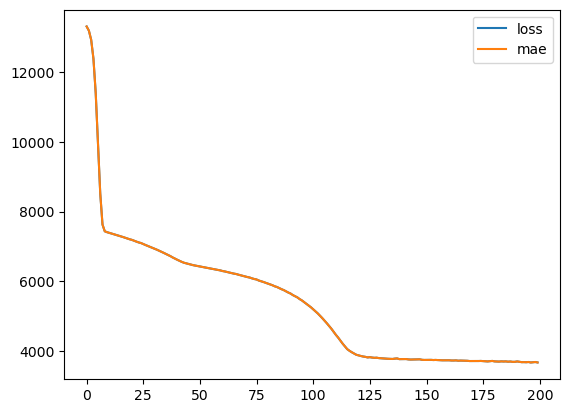

In [37]:
pd.DataFrame(history.history).plot()

# Preprocessing data ( normalization and standerdization)

In [38]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [43]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
#insurance = pd.get_dummies(insurance)
#insurance.head()

In [50]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [55]:
# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

In [47]:
# create X and y values
X = insurance.drop('charges',axis=1)
y = insurance['charges']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [56]:
# fit columns transformer to our training data
ct.fit(X_train)
# transform training and test data 
X_train_norm = ct.transform(X_train)
X_test_norm  = ct.transform(X_test)

In [58]:
X_train_norm[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [61]:
X_train_norm.shape,X_train.shape

((1070, 11), (1070, 6))

In [66]:
tf.random.set_seed(42)
# step 1 - create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# step 2 - compile the model
model_1.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics= ['mae'])
# step 3 - fit the model.
history = model_1.fit(X_train_norm,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13343.9873 - mae: 13343.9873
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13336.4844 - mae: 13336.4844
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13317.7432 - mae: 13317.7432
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13277.5635 - mae: 13277.5635
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13204.5400 - mae: 13204.5400
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13087.7139 - mae: 13087.7139
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12916.9111 - mae: 12916.9111
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12681.7549 - mae: 12681.7549
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12371.4404 - mae: 12371.4404
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11980.00

34/34 [==============================] - 0s 2ms/step - loss: 3679.9746 - mae: 3679.9746
Epoch 82/100
34/34 [==============================] - 0s 2ms/step - loss: 3675.5066 - mae: 3675.5066
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 3668.5850 - mae: 3668.5850
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 3665.2192 - mae: 3665.2192
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 3662.6255 - mae: 3662.6255
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 3660.4373 - mae: 3660.4373
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 3657.5039 - mae: 3657.5039
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 3654.8154 - mae: 3654.8154
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 3653.0615 - mae: 3653.0615
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 3651.3262 - mae: 3651.3262
Epo

<AxesSubplot:>

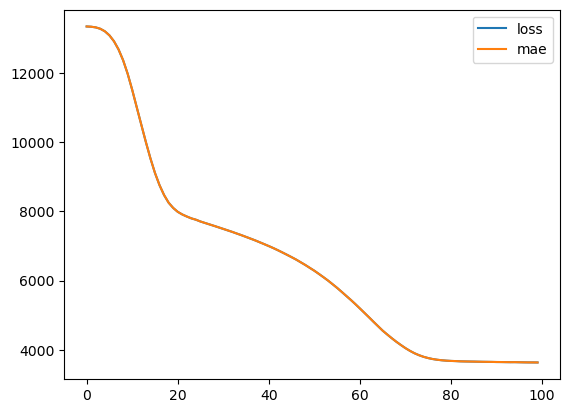

In [67]:
pd.DataFrame(history.history).plot()

In [64]:
model_1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 100)               1200      
                                                                 
 dense_37 (Dense)            (None, 10)                1010      
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [68]:
# check the results on test data
model_1.evaluate(X_test_norm,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.4529 - mae: 3438.4529


[3438.452880859375, 3438.452880859375]